In [1]:
import matplotlib.pyplot as plt
import random
from graphviz import Digraph
from IPython.display import Image

In [2]:
class Node:
    def __init__(self, key, priority):
        self.key = key
        self.priority = priority
        self.left = None
        self.right = None

def split(root, key):
    if not root:
        return (None, None)
    if key <= root.key:
        left, right = split(root.left, key)
        root.left = right
        return (left, root)
    else:
        left, right = split(root.right, key)
        root.right = left
        return (root, right)

def merge(left, right):
    if not left or not right:
        return left or right
    if left.priority > right.priority:
        left.right = merge(left.right, right)
        return left
    else:
        right.left = merge(left, right.left)
        return right

def insert(root, key, priority):
    if not root:
        return Node(key, priority)
    if priority > root.priority:
        left, right = split(root, key)
        node = Node(key, priority)
        node.left = left
        node.right = right
        return node
    elif key < root.key:
        root.left = insert(root.left, key, priority)
    else:
        root.right = insert(root.right, key, priority)
    return root


In [3]:
def visualize_tree_graphviz(root, dot=None):
    if dot is None:
        dot = Digraph()
        dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')

    if root:
        label = f"{root.key}\\n{root.priority}"
        dot.node(str(id(root)), label)
        if root.left:
            dot.edge(str(id(root)), str(id(root.left)))
            visualize_tree_graphviz(root.left, dot)
        if root.right:
            dot.edge(str(id(root)), str(id(root.right)))
            visualize_tree_graphviz(root.right, dot)
    return dot


In [4]:
def get_coords(node, x=0, y=0, coords=None, edges=None):
    if coords is None:
        coords = {}
    if edges is None:
        edges = []

    if node is None:
        return x, coords, edges

    x, coords, edges = get_coords(node.left, x, y - 1, coords, edges)

    coords[node] = (x, y)
    if node.left:
        edges.append((node, node.left))
    if node.right:
        edges.append((node, node.right))

    x += 1

    x, coords, edges = get_coords(node.right, x, y - 1, coords, edges)

    return x, coords, edges

def draw_cartesian_tree(root):
    _, coords, edges = get_coords(root)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Координатная визуализация декартова дерева")

    for parent, child in edges:
        x1, y1 = coords[parent]
        x2, y2 = coords[child]
        ax.plot([x1, x2], [y1, y2], 'k-', linewidth=1)

    for node, (x, y) in coords.items():
        ax.scatter(x, y, color='blue', s=100)
        ax.text(x, y + 0.2, f"{node.key};{node.priority}", ha='center', fontsize=9)

    ax.invert_yaxis()
    ax.grid(True)
    plt.show()


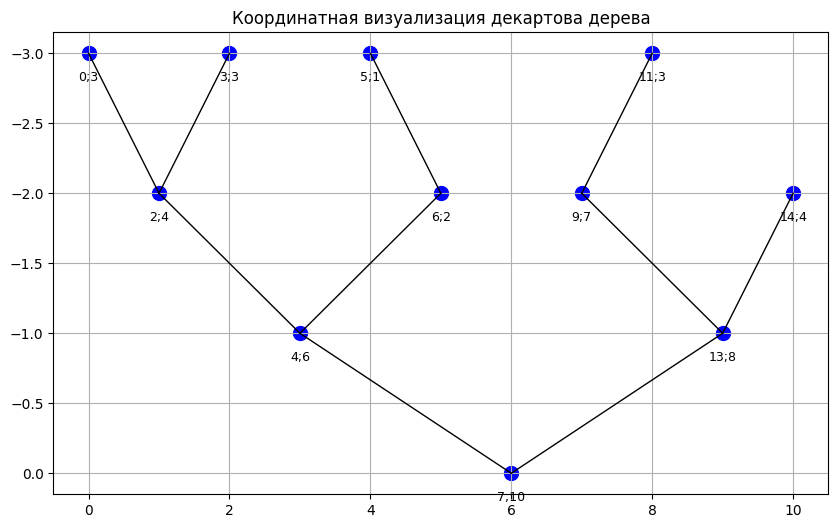

In [5]:
values = [(7, 10), (4, 6), (13, 8), (2, 4), (6, 2), (14, 4),
          (0, 3), (3, 3), (5, 1), (9, 7), (11, 3)]

root = None
for key, priority in values:
    root = insert(root, key, priority)

# Graphviz
dot = visualize_tree_graphviz(root)
dot.format = 'png'
dot.render('tree_graphviz', view=True)

# matplotlib координаты
draw_cartesian_tree(root)


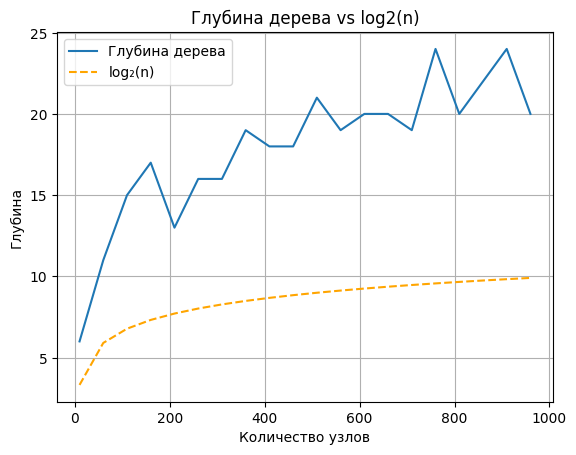

In [8]:
import math
def get_depth(node):
    if not node:
        return 0
    return 1 + max(get_depth(node.left), get_depth(node.right))

ns = list(range(10, 1001, 50))
depths = []

for n in ns:
    root = None
    keys = list(range(n))
    random.shuffle(keys)
    for k in keys:
        root = insert(root, k, random.randint(1, 10**6))
    depths.append(get_depth(root))

plt.plot(ns, depths, label="Глубина дерева")
plt.plot(ns, [math.log2(n) for n in ns], '--', label="log₂(n)", color='orange')
plt.xlabel("Количество узлов")
plt.ylabel("Глубина")
plt.title("Глубина дерева vs log2(n)")
plt.grid(True)
plt.legend()
plt.show()


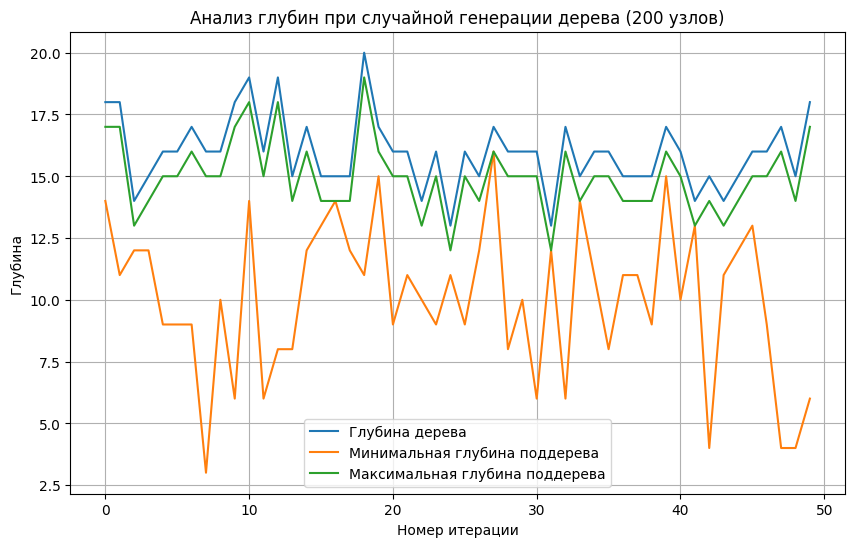

In [9]:
avg_depths = []
min_depths = []
max_depths = []

trials = 50
tree_size = 200

for _ in range(trials):
    root = None
    keys = list(range(tree_size))
    random.shuffle(keys)
    for k in keys:
        priority = random.randint(1, 1_000_000)
        root = insert(root, k, priority)
    d = get_depth(root)
    avg_depths.append(d)
    min_depths.append(min(get_depth(root.left or root), get_depth(root.right or root)))
    max_depths.append(max(get_depth(root.left or root), get_depth(root.right or root)))


plt.figure(figsize=(10,6))
plt.plot(avg_depths, label="Глубина дерева")
plt.plot(min_depths, label="Минимальная глубина поддерева")
plt.plot(max_depths, label="Максимальная глубина поддерева")
plt.xlabel("Номер итерации")
plt.ylabel("Глубина")
plt.title("Анализ глубин при случайной генерации дерева (200 узлов)")
plt.grid(True)
plt.legend()
plt.show()